In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
sample_size = 10000
sample = np.array([np.random.binomial(1, 0.5) for _ in range(sample_size)])
head_count = sample.sum()
head_count_frequency = head_count / sample_size
assert head_count_frequency == sample.mean()

In [2]:
np.random.seed(0)
frequencies = np.random.binomial(sample_size, 0.5, 100000) / sample_size

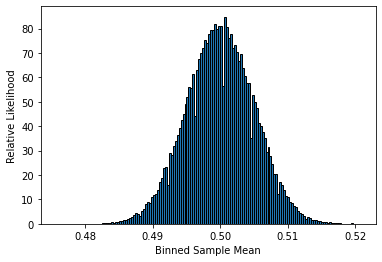

In [3]:
sample_means = frequencies
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto',edgecolor='black', density=True)
plt.xlabel('Binned Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

In [5]:
def squared_distance(value1, value2):
    return (value1 - value2) ** 2

def sum_of_squared_distances(value, measurements):
    return sum(squared_distance(value, m) for m in measurements)

def weighted_variance(data, weights):

    mean = np.average(data, weights=weights)
    squared_distances = [squared_distance(value, mean) for value in data]
    return np.average(squared_distances, weights=weights)
assert weighted_variance([75, 77], [9, 1]) == np.var(9 * [75] + [77])

In [6]:
mean_normal = np.average(bin_edges[:-1], weights=likelihoods)
var_normal = weighted_variance(bin_edges[:-1], likelihoods)
std_normal = var_normal ** 0.5
print(f"Mean is approximately {mean_normal:.2f}")
print(f"Standard deviation is approximately {std_normal:.3f}")

Mean is approximately 0.50
Standard deviation is approximately 0.005


In [7]:
import math
peak_x_value = bin_edges[likelihoods.argmax()]
print(f"Mean is approximately {peak_x_value:.2f}")
peak_y_value = likelihoods.max()
std_from_peak = (peak_y_value * (2* math.pi) ** 0.5) ** -1
print(f"Standard deviation is approximately {std_from_peak:.3f}")

Mean is approximately 0.50
Standard deviation is approximately 0.005


In [8]:
from scipy import stats

In [9]:
fitted_mean, fitted_std = stats.norm.fit(sample_means)
print(f"Mean is approximately {fitted_mean:.2f}")
print(f"Standard deviation is approximately {fitted_std:.3f}")

Mean is approximately 0.50
Standard deviation is approximately 0.005


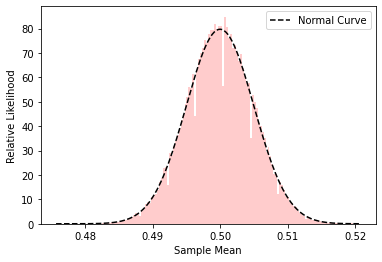

In [10]:
normal_likelihoods = stats.norm.pdf(bin_edges, fitted_mean, fitted_std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--',label='Normal Curve')
plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True)
plt.legend()
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

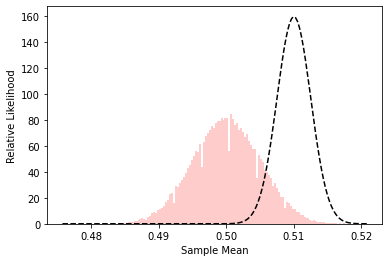

In [11]:
adjusted_likelihoods = stats.norm.pdf(bin_edges, fitted_mean + 0.01,
fitted_std / 2)
plt.plot(bin_edges, adjusted_likelihoods, color='k', linestyle='--')
plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True)
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

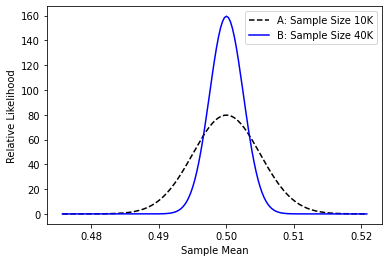

In [12]:
np.random.seed(0)
new_sample_size = 40000
new_head_counts = np.random.binomial(new_sample_size, 0.5, 100000)
new_mean, new_std = stats.norm.fit(new_head_counts / new_sample_size)
new_likelihoods = stats.norm.pdf(bin_edges, new_mean, new_std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--',
label='A: Sample Size 10K')
plt.plot(bin_edges, new_likelihoods, color='b', label='B: Sample Size 40K')
plt.legend()
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

In [13]:
np.random.seed(0)
reduced_sample_size = 2500
head_counts = np.random.binomial(reduced_sample_size, 0.5, 100000)
_, std = stats.norm.fit(head_counts / reduced_sample_size)
variance_ratio = (std ** 2) / (fitted_std ** 2)
print(f"The ratio of variances is approximately {variance_ratio:.1f}")

The ratio of variances is approximately 4.0


In [15]:
estimated_variance = (fitted_std ** 2) * 10000
print(f"Estimated variance for a sample size of 1 is {estimated_variance:.2f}")

Estimated variance for a sample size of 1 is 0.25


In [16]:
assert stats.binom.var(1, 0.5) == 0.25

# Determining the mean and variance of a population through random sampling

e.g fininding the average age of people living in a town

In [17]:
np.random.seed(0)
population_ages = np.random.randint(1, 85, size=50000)

In [20]:
# Computing the population mean and variance
population_mean = population_ages.mean()
population_variance = population_ages.var()

In [21]:
# Simulating 10 interviewed people
np.random.seed(0)
sample_size = 10
sample = np.random.choice(population_ages, size=sample_size)
sample_mean = sample.mean()

In [22]:
# Comparing the sample mean to the population mean
percent_diff = lambda v1, v2: 100 * abs(v1 - v2) / v2
percent_diff_means = percent_diff(sample_mean, population_mean)
print(f"There is a {percent_diff_means:.2f} percent difference between means.")

There is a 27.59 percent difference between means.


In [23]:
# Computing sample means across 1,000 people
np.random.seed(0)
sample_means = [np.random.choice(population_ages, size=sample_size).mean() for _ in range(100)]

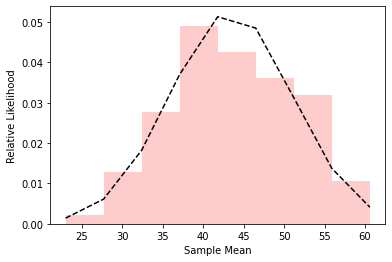

In [24]:
# Fitting sample means to a normal curve
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True)
mean, std = stats.norm.fit(sample_means)
normal_likelihoods = stats.norm.pdf(bin_edges, mean, std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--')
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

overlaid with associated normal distribution. The normal distribution's mean and standard deviation <br>
prameters were derived from the plotted histogram data

In [27]:
# Comparing the normal mean to the population mean
print(f"Actual population mean is approximately {population_mean:.2f}")
percent_diff_means = percent_diff(mean, population_mean)
print(f"There is a {percent_diff_means:.2f}% difference between means.")

# 2.17% is a good approximately

Actual population mean is approximately 42.53
There is a 2.17% difference between means.
